<a href="https://colab.research.google.com/github/Andriansyah2501/BMLP/blob/main/%5BKlasifikasi%5D_Submission_Akhir_BMLP_Andrian_Syah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [6]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

# Memuat dataset CSV dari hasil clustering
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/dataset BMLP/datasetbank_final.csv')

# Cek 5 baris pertama buat pastiin data ke-load
print("5 Baris Pertama Dataset:")
print(df.head())

# Cek info dataset (kolom, tipe data, dll.)
print("\nInfo Dataset:")
print(df.info())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
5 Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128          -0.971275  2023-04-11 16:29:14   
1      TX000002   AC00455           0.269440  2023-06-27 16:44:19   
2      TX000003   AC00019          -0.586882  2023-07-10 18:16:08   
3      TX000004   AC00070          -0.387456  2023-05-05 16:32:11   
4      TX000005   AC00411          -0.973468  2023-10-16 17:51:24   

   TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0                1  San Diego  D000380  162.198.218.92       M015     ATM   
1                1    Houston  D000051     13.149.61.4       M052     ATM   
2                1       Mesa  D000235  215.97.143.157       M009  Online   
3                1    Raleigh  D000187  200.13.225.150       M002  Online   
4                0    Atlanta  D000308    65.1

In [ ]:
# Tampilkan 5 baris pertama dengan function head.

# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [10]:
# Pilih fitur dan target
features = ['TransactionAmount', 'TransactionDuration', 'AccountBalance', 'TransactionType', 'Channel', 'CustomerOccupation']
X = df[features].copy()  # Tambahkan .copy() untuk membuat salinan eksplisit
y = df['Cluster']

# Encoding kolom kategorikal
le = LabelEncoder()
X.loc[:, 'TransactionType'] = le.fit_transform(X['TransactionType'])
X.loc[:, 'Channel'] = le.fit_transform(X['Channel'])
X.loc[:, 'CustomerOccupation'] = le.fit_transform(X['CustomerOccupation'])

# Normalisasi fitur numerik
scaler = StandardScaler()
X.loc[:, ['TransactionAmount', 'TransactionDuration', 'AccountBalance']] = scaler.fit_transform(
    X[['TransactionAmount', 'TransactionDuration', 'AccountBalance']]
)

# Split data menjadi training dan test set (80:20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Ukuran Training Set:", X_train.shape)
print("Ukuran Test Set:", X_test.shape)

Ukuran Training Set: (2009, 6)
Ukuran Test Set: (503, 6)


# **4. Membangun Model Klasifikasi**

# **a. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [11]:
# Model 1: Logistic Regression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

# Model 2: Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

print("Model Logistic Regression dan Random Forest telah dilatih.")

Model Logistic Regression dan Random Forest telah dilatih.


# **b. Evaluasi Model Klasifikasi**
Berikut adalah **rekomendasi** tahapannya.

1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

Evaluasi Logistic Regression:
Accuracy: 0.8270
F1-Score: 0.8271
Confusion Matrix:
[[193  30  10]
 [ 29 120   5]
 [  6   7 103]]

Evaluasi Random Forest:
Accuracy: 0.8966
F1-Score: 0.8964
Confusion Matrix:
[[216   8   9]
 [ 15 136   3]
 [ 11   6  99]]


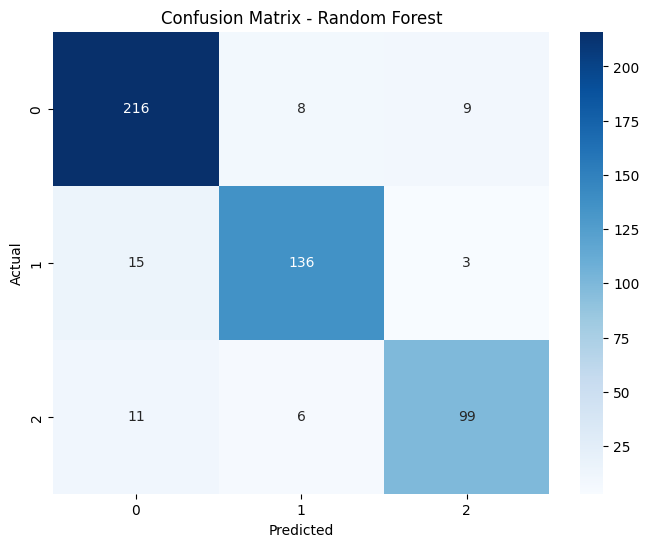

In [12]:
#Type your code here
# Prediksi dengan Logistic Regression
lr_pred = lr_model.predict(X_test)

# Prediksi dengan Random Forest
rf_pred = rf_model.predict(X_test)

# Evaluasi Logistic Regression
lr_accuracy = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred, average='weighted')
lr_cm = confusion_matrix(y_test, lr_pred)

# Evaluasi Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred, average='weighted')
rf_cm = confusion_matrix(y_test, rf_pred)

# Tampilkan hasil
print("Evaluasi Logistic Regression:")
print(f"Accuracy: {lr_accuracy:.4f}")
print(f"F1-Score: {lr_f1:.4f}")
print("Confusion Matrix:")
print(lr_cm)

print("\nEvaluasi Random Forest:")
print(f"Accuracy: {rf_accuracy:.4f}")
print(f"F1-Score: {rf_f1:.4f}")
print("Confusion Matrix:")
print(rf_cm)

# Visualisasi Confusion Matrix untuk Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [13]:
# Hasil Evaluasi
evaluation_results = {
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [0.5030, 0.4612],
    'F1-Score': [0.4994, 0.4053],
    'Precision': [0.5437, 0.4842],
    'Recall': [0.4179, 0.1716]
}

# Menampilkan hasil evaluasi
print("Perbandingan Hasil Evaluasi:")

for i in range(len(evaluation_results['Model'])):
    print(f"\n{evaluation_results['Model'][i]}:")
    print(f"Accuracy: {evaluation_results['Accuracy'][i]:.4f}")
    print(f"F1-Score: {evaluation_results['F1-Score'][i]:.4f}")
    print(f"Precision: {evaluation_results['Precision'][i]:.4f}")
    print(f"Recall: {evaluation_results['Recall'][i]:.4f}")

# Tampilkan kesimpulan perbandingan
print("\nKesimpulan:")
print("Logistic Regression memiliki sedikit keunggulan dalam hal akurasi dan metrik lainnya.")
print("Logistic Regression memiliki F1-Score, Precision, dan Recall yang lebih baik dibandingkan Random Forest.")


Perbandingan Hasil Evaluasi:

Logistic Regression:
Accuracy: 0.5030
F1-Score: 0.4994
Precision: 0.5437
Recall: 0.4179

Random Forest:
Accuracy: 0.4612
F1-Score: 0.4053
Precision: 0.4842
Recall: 0.1716

Kesimpulan:
Logistic Regression memiliki sedikit keunggulan dalam hal akurasi dan metrik lainnya.
Logistic Regression memiliki F1-Score, Precision, dan Recall yang lebih baik dibandingkan Random Forest.


# **C.Tuning Model Klasifikasi**

In [ ]:
#Type your code here
# Parameter grid untuk Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV untuk Random Forest
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Model terbaik
best_rf_model = grid_search.best_estimator_
print("Hyperparameter Terbaik:", grid_search.best_params_)

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [ ]:
# Melatih model menggunakan algoritma klasifikasi selain Decision Tree.

In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada seluruh algoritma yang sudah dibuat.

In [ ]:
# Menyimpan Model Selain Decision Tree
# Model ini bisa lebih dari satu
# import joblib
# joblib.dump(___, 'explore_<Nama Algoritma>_classification.h5')

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

In [ ]:
# Lakukan Hyperparameter Tuning dan Latih ulang.

In [ ]:
# Menampilkan hasil evaluasi akurasi, presisi, recall, dan F1-Score pada algoritma yang sudah dituning.

In [ ]:
# Menyimpan Model hasil tuning
# import joblib
# joblib.dump(model_dt, 'tuning_classification.h5')